# Importing necessary libraries


In [ ]:
import numpy as np 
import pandas as pd 
import os
import math
import seaborn as sns
import datetime as dt
from datetime import datetime  
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt

# **CNN-LSTM MODEL**

# Loading the dataset.

In [ ]:
df = pd.read_csv('/content/Sample - Superstore.csv',encoding='Latin', parse_dates=["Order Date"])
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.describe()  

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [ ]:
# Dropping the column 'Row ID', as it does not help much in the process of data analysis of the dataset.
df.drop('Row ID',axis = 1, inplace = True)

In [ ]:
print('Order Date Description\n') 
print(df['Order Date'].describe()) #Displays the distribution of dates in 'Order Data' column
print('\nShip Date Description\n')
print(df['Ship Date'].describe()) #Displays the distribution of dates in 'Ship Data' column

Order Date Description

count                    9994
unique                   1237
top       2016-09-05 00:00:00
freq                       38
first     2014-01-03 00:00:00
last      2017-12-30 00:00:00
Name: Order Date, dtype: object

Ship Date Description

count           9994
unique          1334
top       12/16/2015
freq              35
Name: Ship Date, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


In [ ]:
#sorting data by order date
df.sort_values(by=['Order Date'], inplace=True, ascending=True) #Sorting data by  ascending order of the coloumn values 'Order Date'
df.set_index("Order Date", inplace = True) #Setting 'Order Date' as index of the dataframe 'df' for ease of Time Series Analysis


In [ ]:
store=[]
df1 = df.groupby('Sub-Category')['Quantity'].sum()
df1 = df1.sort_values(ascending=False)
for i in df1.keys():
  store.append(i)

df = df[df['Sub-Category']==store[0]]

In [ ]:
# To forecast sales seven days later of the order date, let us create a new dataframe with only the target column i.e, 
# the 'Sales' column and 'Order Date' as the index 

new_data = pd.DataFrame(df['Quantity'])
new_data

,Quantity
Order Date,
2014-01-04,2
2014-01-06,2
2014-01-07,7
2014-01-13,3
2014-01-13,2
...,...
2017-12-28,2
2017-12-29,1
2017-12-30,2


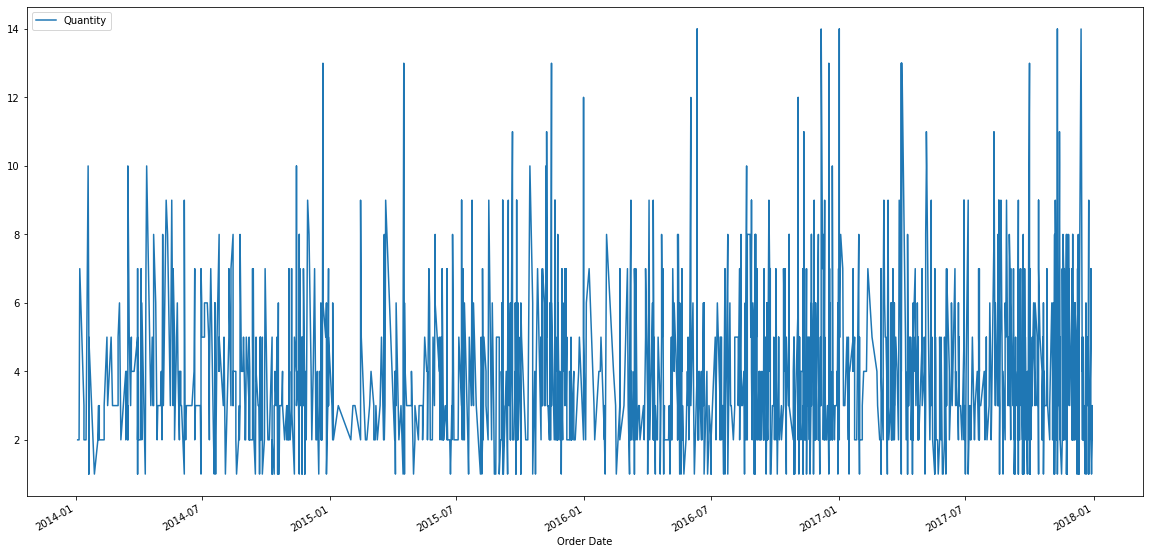

In [ ]:
#Plotting the data to understand the sales distribution from the year 2014-2018
new_data.plot();

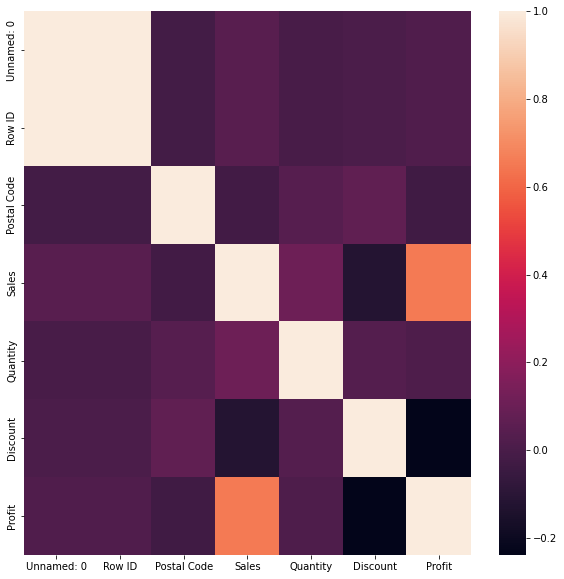

In [ ]:
# Check for factors responsible in overall volume trade
fig, ax = plt.subplots (figsize = (10, 10))
df_item1 = pd.read_csv('/content/item1.csv',encoding='Latin',parse_dates=["Order Date"])
corr_matrix = df_item1.corr() # Perform default correlation using Pearson Method 

# Plot the correlation matrix in a heatmap to understand better
sns.heatmap(corr_matrix, xticklabels = corr_matrix.columns.values, yticklabels = corr_matrix.columns.values)

# Training the model

In [ ]:
df_item1 = new_data
len(df_item1)


1523

In [ ]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df_item1) - window_size -1 , 1):
    first = df_item1['Quantity'][i]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df_item1['Quantity'][i + j] - first) / first)
    temp2.append((df_item1['Quantity'][i + window_size] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

1136
285


In [ ]:
# For creating model and training
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()

# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
# model.add(Dense(5, kernel_regularizer=L2(0.01)))

# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

Epoch 1/40
29/29 [==============================] - 13s 110ms/step - loss: 1.1769 - mse: 1.1769 - mae: 0.7410 - val_loss: 0.7925 - val_mse: 0.7925 - val_mae: 0.5939
Epoch 2/40
29/29 [==============================] - 1s 42ms/step - loss: 0.9786 - mse: 0.9786 - mae: 0.6606 - val_loss: 0.8260 - val_mse: 0.8260 - val_mae: 0.6297
Epoch 3/40
29/29 [==============================] - 1s 41ms/step - loss: 0.9510 - mse: 0.9510 - mae: 0.6483 - val_loss: 0.8533 - val_mse: 0.8533 - val_mae: 0.6522
Epoch 4/40
29/29 [==============================] - 1s 41ms/step - loss: 0.9723 - mse: 0.9723 - mae: 0.6645 - val_loss: 0.7974 - val_mse: 0.7974 - val_mae: 0.6058
Epoch 5/40
29/29 [==============================] - 1s 41ms/step - loss: 0.9248 - mse: 0.9248 - mae: 0.6403 - val_loss: 0.8162 - val_mse: 0.8162 - val_mae: 0.6246
Epoch 6/40
29/29 [==============================] - 1s 41ms/step - loss: 0.9065 - mse: 0.9065 - mae: 0.6478 - val_loss: 0.9291 - val_mse: 0.9291 - val_mae: 0.6075
Epoch 7/40
29/29 [==

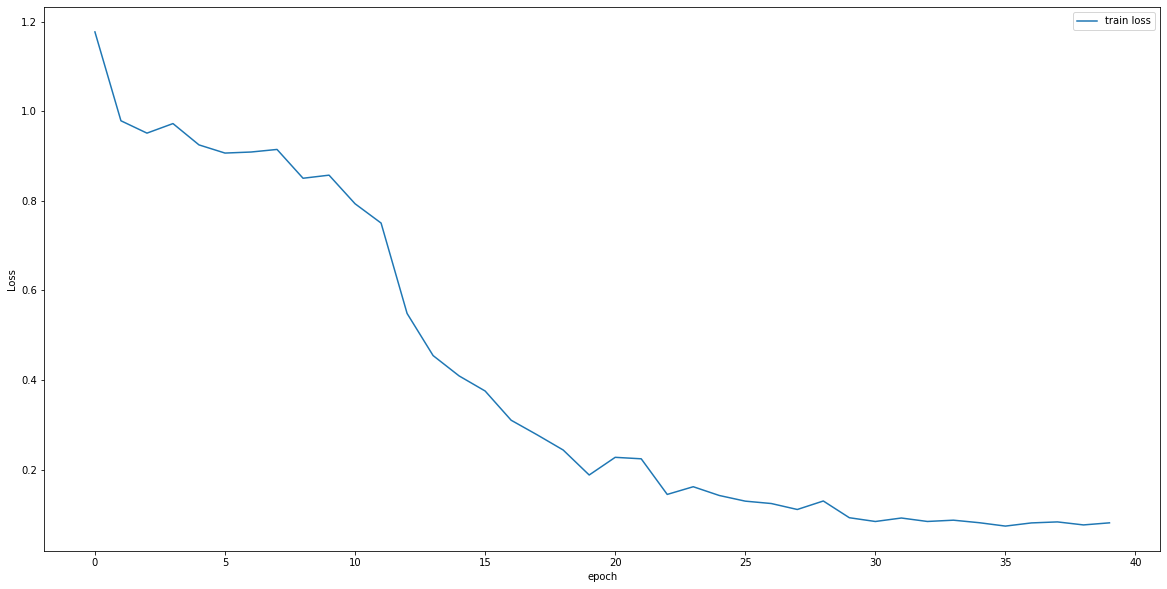

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

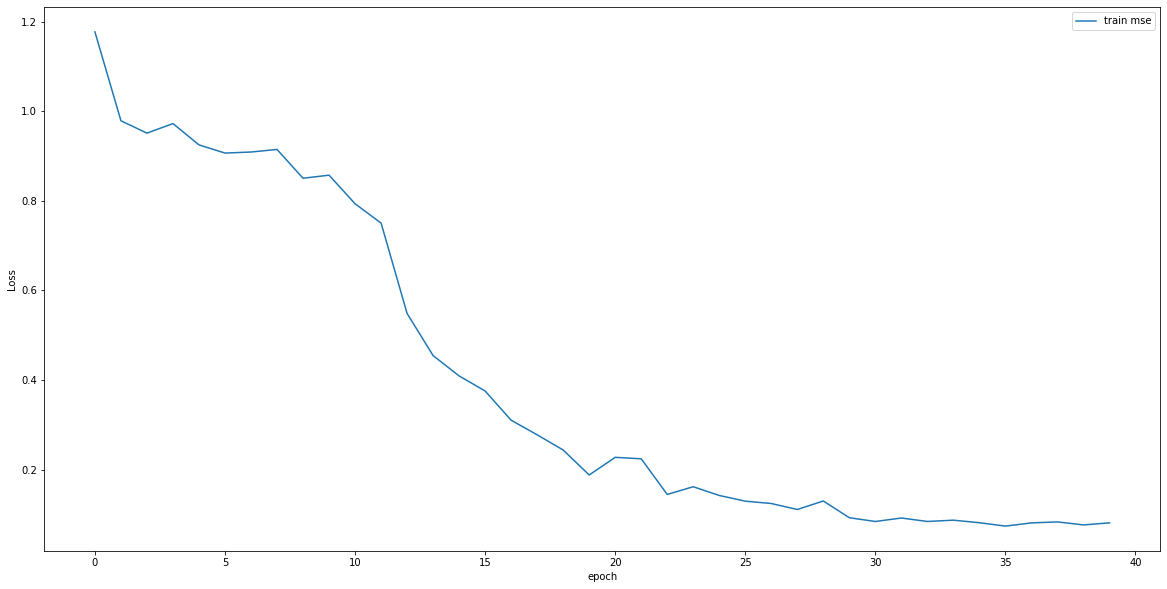

In [ ]:
plt.plot(history.history['mse'], label='train mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

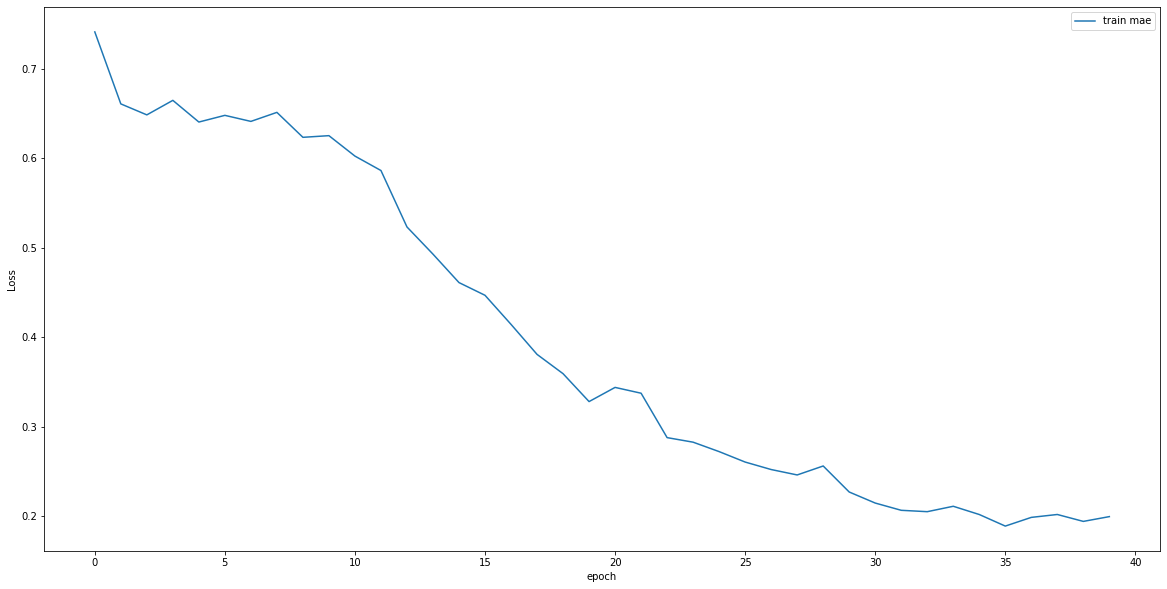

In [ ]:
plt.plot(history.history['mae'], label='train mae')  
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_14 (TimeDi  (None, 1, 98, 64)        256       
 stributed)                                                      
                                                                 
 time_distributed_15 (TimeDi  (None, 1, 49, 64)        0         
 stributed)                                                      
                                                                 
 time_distributed_16 (TimeDi  (None, 1, 47, 128)       24704     
 stributed)                                                      
                                                                 
 time_distributed_17 (TimeDi  (None, 1, 23, 128)       0         
 stributed)                                                      
                                                                 
 time_distributed_18 (TimeDi  (None, 1, 21, 64)       

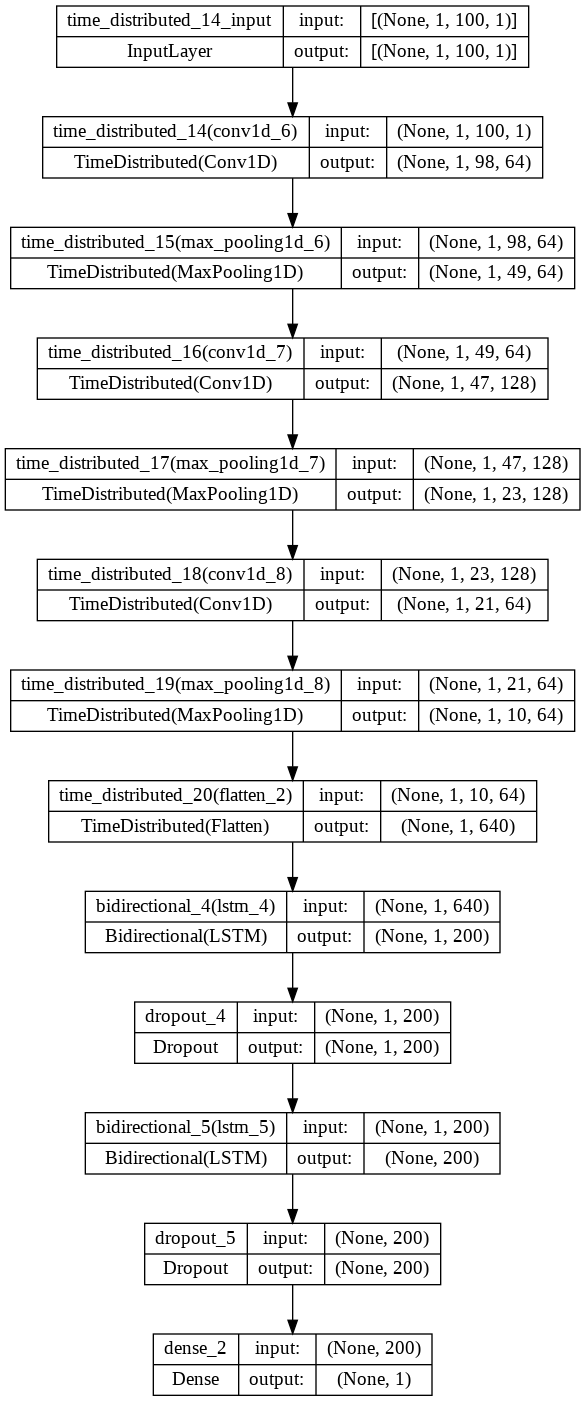

In [ ]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.evaluate(test_X, test_Y)

9/9 [==============================] - 0s 14ms/step - loss: 1.1326 - mse: 1.1326 - mae: 0.7039


[1.1325892210006714, 1.1325892210006714, 0.703901469707489]

In [ ]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.430724
R2 Score: 0.430724
Max Error: 4.633947


In [ ]:
data = pd.read_csv('/content/item1.csv',encoding='Latin',parse_dates=["Order Date"])
data = data.iloc[:, [3, -3]]

9/9 [==============================] - 0s 14ms/step


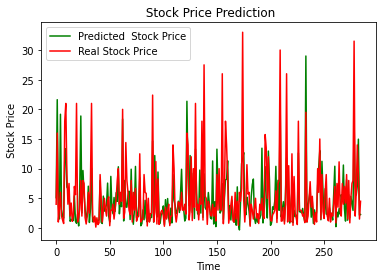

In [ ]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,1]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [ ]:
# First we need to save a model
model.save("model.h5")

In [ ]:
# Load model
new_model = tf.keras.models.load_model("./model.h5")

In [ ]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_7 (TimeDis  (None, 1, 98, 64)        256       
 tributed)                                                       
                                                                 
 time_distributed_8 (TimeDis  (None, 1, 49, 64)        0         
 tributed)                                                       
                                                                 
 time_distributed_9 (TimeDis  (None, 1, 47, 128)       24704     
 tributed)                                                       
                                                                 
 time_distributed_10 (TimeDi  (None, 1, 23, 128)       0         
 stributed)                                                      
                                                                 
 time_distributed_11 (TimeDi  (None, 1, 21, 64)       

# Testing the data

In [ ]:
data2 = pd.read_csv('/content/item1.csv',encoding='Latin',parse_dates=["Order Date"])
data2 = data2.iloc[:, [3, -3]]
data2.dropna(inplace=True)
data2.head()

data2.reset_index(drop=True, inplace=True)
data2.fillna(data.mean(), inplace=True)
data2.head()
df2 = data2.drop('Order Date', axis=1)

print(df2)

X = []
Y = []
window_size=100
for i in range(1 , len(df2) - window_size -1 , 1):
    first = df2.iloc[i,0]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df2.iloc[i + j, 0] - first) / first)
    # for j in range(week):
    temp2.append((df2.iloc[i + window_size, 0] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  import sys


      Quantity
0            3
1            3
2            3
3            4
4            2
...        ...
1518         5
1519         2
1520         2
1521         4
1522        14

[1523 rows x 1 columns]
1136
285


In [ ]:
model.evaluate(test_X, test_Y)

9/9 [==============================] - 0s 13ms/step - loss: 0.2388 - mse: 0.2388 - mae: 0.2592


[0.2388390302658081, 0.2388390302658081, 0.25919270515441895]

9/9 [==============================] - 0s 11ms/step


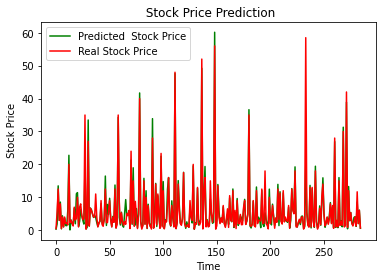

In [ ]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data2.iloc[j,1]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

# **ARIMA MODEL**

In [ ]:
df = pd.read_csv('/content/Sample - Superstore.csv',encoding='Latin', parse_dates=["Order Date"])
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.describe()  

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [ ]:
# Dropping the column 'Row ID', as it does not help much in the process of data analysis of the dataset.
df.drop('Row ID',axis = 1, inplace = True)

In [ ]:
print('Order Date Description\n') 
print(df['Order Date'].describe()) #Displays the distribution of dates in 'Order Data' column
print('\nShip Date Description\n')
print(df['Ship Date'].describe()) #Displays the distribution of dates in 'Ship Data' column

Order Date Description

count                    9994
unique                   1237
top       2016-09-05 00:00:00
freq                       38
first     2014-01-03 00:00:00
last      2017-12-30 00:00:00
Name: Order Date, dtype: object

Ship Date Description

count           9994
unique          1334
top       12/16/2015
freq              35
Name: Ship Date, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


In [ ]:
#sorting data by order date
df.sort_values(by=['Order Date'], inplace=True, ascending=True) #Sorting data by  ascending order of the coloumn values 'Order Date'
df.set_index("Order Date", inplace = True) #Setting 'Order Date' as index of the dataframe 'df' for ease of Time Series Analysis


In [ ]:
store=[]
df1 = df.groupby('Sub-Category')['Quantity'].sum()
df1 = df1.sort_values(ascending=False)
for i in df1.keys():
  store.append(i)

df = df[df['Sub-Category']==store[0]]

In [ ]:
# To forecast sales seven days later of the order date, let us create a new dataframe with only the target column i.e, 
# the 'Sales' column and 'Order Date' as the index 

new_data = pd.DataFrame(df['Quantity'])
new_data

,Quantity
Order Date,
2014-01-04,2
2014-01-06,2
2014-01-07,7
2014-01-13,3
2014-01-13,2
...,...
2017-12-28,2
2017-12-29,1
2017-12-30,2


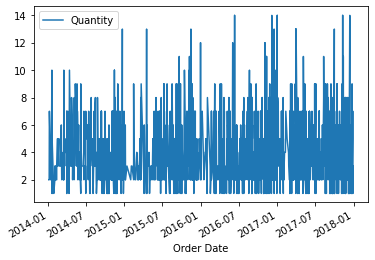

In [ ]:
#Plotting the data to understand the sales distribution from the year 2015-2018
new_data.plot();

In [ ]:
# # Checkting for Stationarity
new_data =  pd.DataFrame(new_data['Quantity'].resample('D').mean())
new_data = new_data.interpolate(method='linear') #The interpolate() function is used to interpolate values according to 
#different methods. It ignore the index and treats the values as equally spaced.


In [ ]:
# Method 1
# To check for stationarity by comparing the change in mean and variance over time, let us split the data into train, test and validate.
train, test, validate = np.split(new_data['Quantity'].sample(frac=1), [int(.6*len(new_data['Quantity'])),int(.8*len(new_data['Quantity']))])

In [ ]:
print('Train Dataset')
print(train)
print('Test Dataset')
print(test)
print('Validate Dataset')
print(validate)

Train Dataset
Order Date
2015-06-29    2.000000
2017-12-04    3.000000
2014-09-08    3.000000
2017-10-26    5.000000
2017-04-09    4.333333
                ...   
2016-12-04    2.000000
2014-10-29    2.111111
2017-11-22    3.583333
2016-10-02    5.000000
2014-05-14    6.750000
Name: Quantity, Length: 874, dtype: float64
Test Dataset
Order Date
2017-01-31    2.444444
2016-05-01    2.000000
2014-11-01    2.500000
2016-08-27    5.000000
2017-06-29    5.333333
                ...   
2016-12-17    5.333333
2016-06-09    4.166667
2015-08-16    2.500000
2016-07-15    3.250000
2015-03-11    2.250000
Name: Quantity, Length: 291, dtype: float64
Validate Dataset
Order Date
2014-07-24    5.222222
2014-09-21    3.000000
2017-03-15    3.944444
2016-01-02    3.142857
2016-12-18    4.333333
                ...   
2016-11-24    4.500000
2015-09-23    3.166667
2017-07-03    4.333333
2017-06-18    3.333333
2016-02-12    4.000000
Name: Quantity, Length: 292, dtype: float64


In [ ]:
mean1, mean2, mean3 = train.mean(), test.mean(), validate.mean() #taking mean of train, test and validate data
var1, var2, var3 = train.var(), test.var(), validate.var() #taking variance of train, test and validate data

print('Mean:')
print(mean1, mean2, mean3)
print('Variance:')
print(var1, var2, var3)

Mean:
3.8219337168679273 3.8649976941729514 3.9235232090968393
Variance:
2.8011379665477896 2.963152229192345 2.8396344180877615


In [ ]:
# Method 2
# Augmented Dicky Fuller Test

from statsmodels.tsa.stattools import adfuller #importing adfuller tool from statsmodels
#statsmodels provide adfuller() fucntion to implement stationarity test of a time series

adf = adfuller(new_data) 

print(adf)
print('\nADF = ', str(adf[0])) #more towards negative value the better
print('\np-value = ', str(adf[1]))
print('\nCritical Values: ')

for key, val in adf[4].items(): #for loop to print the p-value (1%, 5% and 10%) and their respective values
    print(key,':',val)
    

    if adf[0] < val:
        print('Null Hypothesis Rejected. Time Series is Stationary')
    else:
        print('Null Hypothesis Accepted. Time Series is not Stationary')

(-18.548664781735837, 2.0936531404251627e-30, 1, 1455, {'1%': -3.4348523191002123, '5%': -2.8635284734563364, '10%': -2.567828646449617}, 4987.231018757714)

ADF =  -18.548664781735837

p-value =  2.0936531404251627e-30

Critical Values: 
1% : -3.4348523191002123
Null Hypothesis Rejected. Time Series is Stationary
5% : -2.8635284734563364
Null Hypothesis Rejected. Time Series is Stationary
10% : -2.567828646449617
Null Hypothesis Rejected. Time Series is Stationary


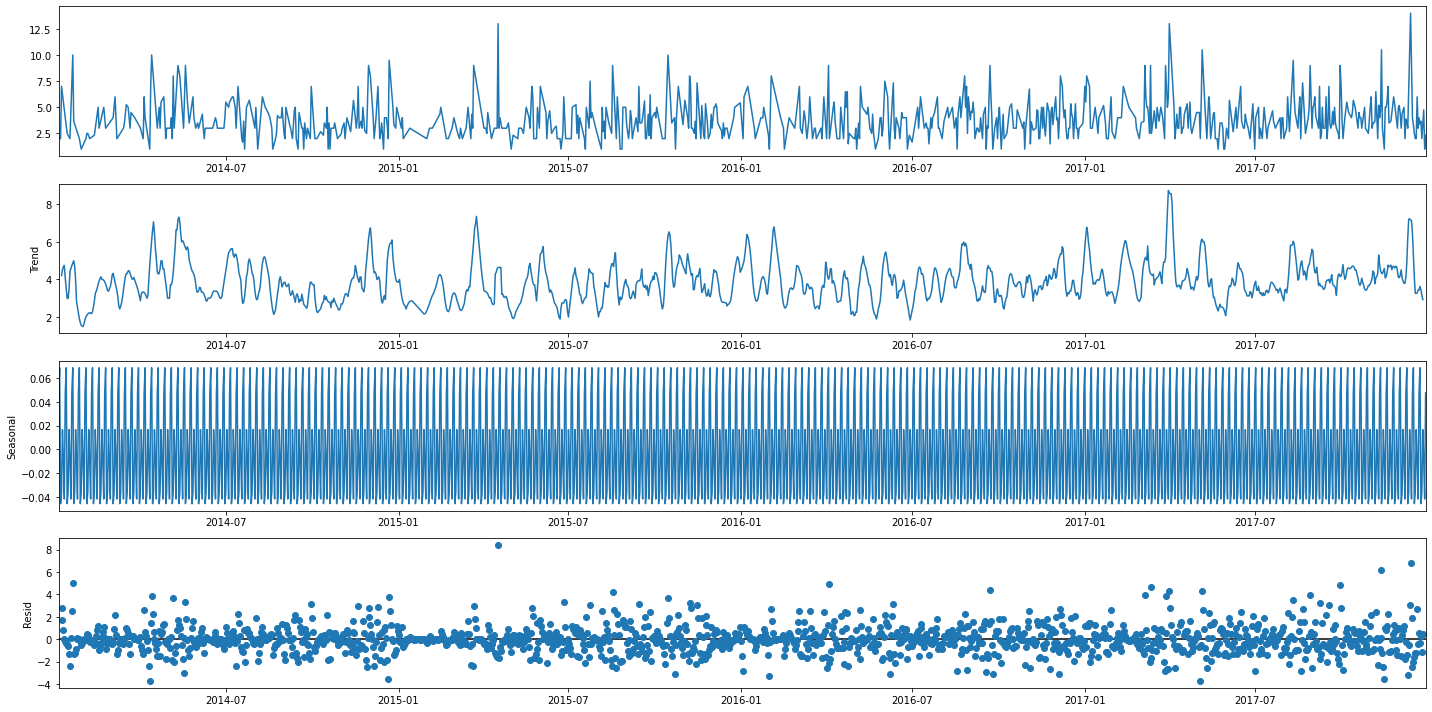

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(new_data, model='additive') #function used to decompose Time Series Data into Trend and Seasonality
fig = decomposition.plot()
plt.show();

In [ ]:
import itertools
p = d = q = range(0, 2) 
pdq = list(itertools.product(p, d, q))
seasonal_pdq_comb = [(i[0], i[1], i[2], 12) for i in list(itertools.product(p, d, q))] #for loop for creating combinations of seasonal parameters of SARIMA
print('Examples of parameter combinations for Seasonal ARIMA:')
print('SARIMA: {} x {}'.format(pdq[1], seasonal_pdq_comb[1]))
print('SARIMA: {} x {}'.format(pdq[1], seasonal_pdq_comb[2]))
print('SARIMA: {} x {}'.format(pdq[2], seasonal_pdq_comb[3]))
print('SARIMA: {} x {}'.format(pdq[2], seasonal_pdq_comb[4]))

Examples of parameter combinations for Seasonal ARIMA:
SARIMA: (0, 0, 1) x (0, 0, 1, 12)
SARIMA: (0, 0, 1) x (0, 1, 0, 12)
SARIMA: (0, 1, 0) x (0, 1, 1, 12)
SARIMA: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
for parameters in pdq: #for loop for determining the best combination of seasonal parameters for SARIMA
    for seasonal_param in seasonal_pdq_comb:
        try:
            mod = sm.tsa.statespace.SARIMAX(new_data,
                                            order=parameters,
                                            seasonal_param_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False) #determines the AIC value of the model**
            results = mod.fit()
            print('SARIMA{}x{}12 - AIC:{}'.format(parameters, seasonal_param, results.aic))
        except:
            continue

# **The Akaike information criterion (AIC) is an estimator of out-of-sample prediction error and thereby relative 
# quality of statistical models for a given set of data. AIC estimates the relative amount of information lost 
# by a given model. The less information a model loses, the higher the quality of that model.        

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:8315.857212913823
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:8315.857212913823
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:8315.857212913823
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:8315.857212913823
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:8315.857212913823
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:8315.857212913823
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:8315.857212913823
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:8315.857212913823
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:7033.119871388341
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:7033.119871388341
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:7033.119871388341
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:7033.119871388341
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:7033.119871388341
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:7033.119871388341
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:7033.119871388341
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:7033.119871388341
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:5435.038507166219
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:5435.03850

In [ ]:
# After choosing the combination of seasonal parameters with least AIC value, let us train the SARIMA model
mod = sm.tsa.statespace.SARIMAX(new_data,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False) #model defintion
results = mod.fit() #model fitting
print(results.summary().tables[1]) # displaying the result 

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5648      0.018     32.020      0.000       0.530       0.599
ma.L1         -1.0004      0.024    -40.839      0.000      -1.048      -0.952
ar.S.L12   -7.675e-05      0.003     -0.022      0.982      -0.007       0.007
ma.S.L12      -1.0145      0.013    -77.009      0.000      -1.040      -0.989
sigma2         1.8831      0.081     23.184      0.000       1.724       2.042


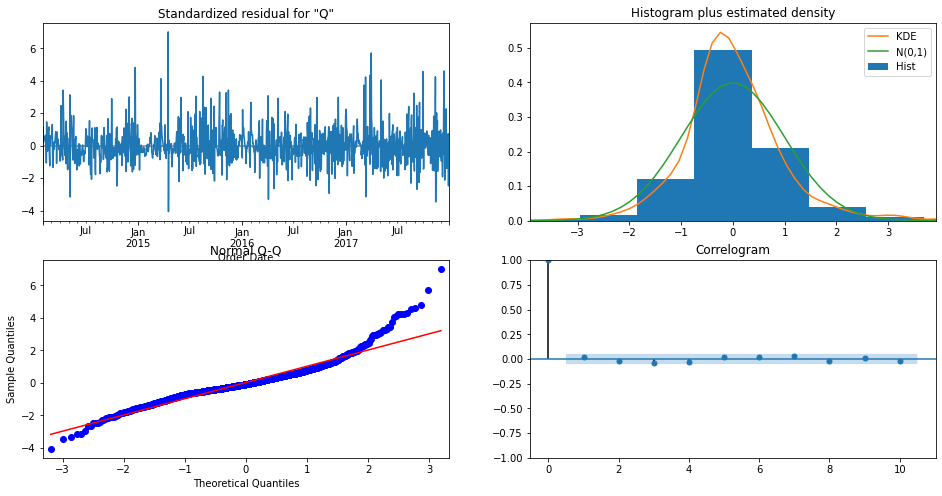

In [ ]:
results.plot_diagnostics(figsize=(16, 8)) #Produces a plot grid of: 1. Standardized residuals over time 
# 2. Histogram plus estimated density of standardized residulas and along with a Normal(0,1) density plotted for reference.
# 3. Normal Q-Q plot, with Normal reference line and, 4. Correlogram.
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


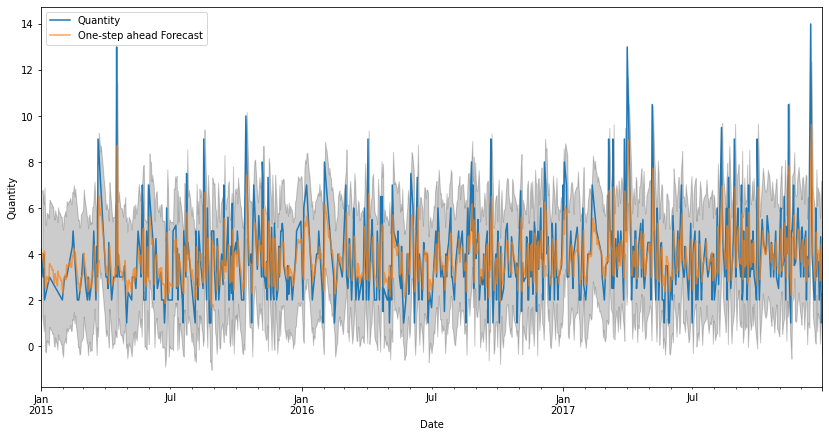

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2015-01-03'), dynamic=False) # variable to display plot for predicted values
pred_val = pred.conf_int()
ax = new_data['2015':].plot(label='observed') # displays plot for original values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7)) # displays plot for predicted values
ax.fill_between(pred_val.index,
                pred_val.iloc[:, 0],
                pred_val.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Quantity')
plt.legend()
plt.show()

In [ ]:

y_forecasted = pred.predicted_mean

y_truth = new_data[new_data.index >= pd.to_datetime('2015-01-03')]['Quantity']
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(y_forecasted, y_truth)
rmse = sqrt(mse)
print('The Mean Squared Error of the forecasts is {}'.format(round(rmse, 2))) # displays the root mean squared error of the forecast with rounding it up to 2 decimals

The Mean Squared Error of the forecasts is 1.43


In [ ]:
# mod = sm.tsa.statespace.SARIMAX(new_data,
#                                 order=(1, 1, 1),
#                                 seasonal_order=(1, 1, 1, 12),
#                                 enforce_stationarity=False,
#                                 enforce_invertibility=False) #model defintion
# results = mod.fit() #model fitting

forecast = results.forecast(steps=7) # making a forecast of 7 days later of the last date in the 'Order Date' column
print(forecast.astype('int')) #displays the sales forecast as type integer

2017-12-31    3
2018-01-01    3
2018-01-02    3
2018-01-03    3
2018-01-04    3
2018-01-05    4
2018-01-06    4
Freq: D, Name: predicted_mean, dtype: int64


In [ ]:
forecast = forecast.astype('int') #saving the sales values as type integer
forecast_df = forecast.to_frame() # forecast is in Series form, converting it to DataFrame
forecast_df.reset_index(level=0, inplace=True) # converting the index to column
forecast_df.columns = ['Prediction Date', 'Predicted Quantity'] # giving appropriate names to the output columns
prediction = pd.DataFrame(forecast_df).to_csv('prediction.csv',index=False) # saving the output as a csv file with name 'prediction.csv'